# Introduction
Bellabeat is a high-tech manufacturer of health-focused products for women and is a successful small company, but they have the potential to become a larger player in the global smart device market. My job is to discover the trends and help them become a larger company. In this report I will walk you through the steps that I did to achieve this. These steps are consist of identifying the problems and setting a business task, collecting, cleaning and transforming the data, analyzing the information we gather from the data and visualizing it for a better presentation, lastly the act phase where I share my key findings to help the company.

# Ask
Our stakeholders want us to answer the following questions:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat's marketing strategy

## Business Task 
The objective of this case study is to analyze smart device usage data to uncover trends in consumer behavior with non-Bellabeat smart devices.

# Prepare
**Data Source:** FitBit Fitness Tracker Dataset

**About Data:** This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

**Dataset Summary:** This dataset consist of 2 months. First month has 35, second month has 33 unique people that participated in this dataset. Some datasets have even lower participation then that. Although small number of users, we will help the company as much as we can. With this low sample size, we cannot be so sure about the insights in this analysis are representative of our total population. There are so many missing values in 'weightLogInfo_merged' such as 'Fat' column is mostly NaN. The absence of gender and age details is a significant concern, since our target audience is women, we need those details to land more accurate inferences.

# Process
This section is mostly about data cleaning and transformation. We will start with importing libraries and data, later on we will add new columns to data for a better understanding and visualization.

In [5]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
pd.set_option('display.max.rows', 100)

In [6]:
# Importing data
daily_activity_1 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\dailyActivity_merged.csv")
daily_activity_2 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")

heartrate_seconds_1 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\heartrate_seconds_merged.csv")
heartrate_seconds_2 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\heartrate_seconds_merged.csv")

hourly_calories_1 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\hourlyCalories_merged.csv")
hourly_calories_2 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\hourlyCalories_merged.csv")

hourly_intensities_1 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\hourlyIntensities_merged.csv")
hourly_intensities_2 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\hourlyIntensities_merged.csv")

hourly_steps_1 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\hourlySteps_merged.csv")
hourly_steps_2 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\hourlySteps_merged.csv")

met_minute_1 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\minuteMETsNarrow_merged.csv")
met_minute_2 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\minuteMETsNarrow_merged.csv")

minute_sleep_1 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\minuteSleep_merged.csv")
minute_sleep_2 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\minuteSleep_merged.csv")

weight_log_1 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\weightLogInfo_merged.csv")
weight_log_2 = pd.read_csv(r"C:\Users\volka\OneDrive\Masaüstü\Case_Study_2\fitbit_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\weightLogInfo_merged.csv")

In [7]:
# Adding first and second month the data
daily_activity_all = pd.concat([daily_activity_1, daily_activity_2])
heartrate_seconds_all = pd.concat([heartrate_seconds_1, heartrate_seconds_2])
hourly_calories_all = pd.concat([hourly_calories_1, hourly_calories_2])
hourly_intensities_all = pd.concat([hourly_intensities_1, hourly_intensities_2])
hourly_steps_all = pd.concat([hourly_steps_1, hourly_steps_2])
met_minute_all = pd.concat([met_minute_1, met_minute_2])
minute_sleep_all = pd.concat([minute_sleep_1, minute_sleep_2])
weight_log_all = pd.concat([weight_log_1, weight_log_2])

In [8]:
# Resetting index so added data index doesn't start with 0
daily_activity_all.reset_index(drop = True, inplace = True)
heartrate_seconds_all.reset_index(drop = True, inplace = True)
hourly_calories_all.reset_index(drop = True, inplace = True)
hourly_intensities_all.reset_index(drop = True, inplace = True)
hourly_steps_all.reset_index(drop = True, inplace = True)
met_minute_all.reset_index(drop = True, inplace = True)
minute_sleep_all.reset_index(drop = True, inplace = True)
weight_log_all.reset_index(drop = True, inplace = True)

After binding the data, we will look through it using info() and head() functions to see if there is anything to be done.

In [10]:
daily_activity_all.info() # ActivityDate should be in datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1397 non-null   int64  
 1   ActivityDate              1397 non-null   object 
 2   TotalSteps                1397 non-null   int64  
 3   TotalDistance             1397 non-null   float64
 4   TrackerDistance           1397 non-null   float64
 5   LoggedActivitiesDistance  1397 non-null   float64
 6   VeryActiveDistance        1397 non-null   float64
 7   ModeratelyActiveDistance  1397 non-null   float64
 8   LightActiveDistance       1397 non-null   float64
 9   SedentaryActiveDistance   1397 non-null   float64
 10  VeryActiveMinutes         1397 non-null   int64  
 11  FairlyActiveMinutes       1397 non-null   int64  
 12  LightlyActiveMinutes      1397 non-null   int64  
 13  SedentaryMinutes          1397 non-null   int64  
 14  Calories

In [11]:
heartrate_seconds_all.info() #Time should be in datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638339 entries, 0 to 3638338
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 83.3+ MB


In [12]:
hourly_calories_all.info() # ActivityHour should be in datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46183 entries, 0 to 46182
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            46183 non-null  int64 
 1   ActivityHour  46183 non-null  object
 2   Calories      46183 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [13]:
hourly_intensities_all.info() # ActivityHour should be in datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46183 entries, 0 to 46182
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                46183 non-null  int64  
 1   ActivityHour      46183 non-null  object 
 2   TotalIntensity    46183 non-null  int64  
 3   AverageIntensity  46183 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ MB


In [14]:
hourly_steps_all.info() # ActivityHour should be in datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46183 entries, 0 to 46182
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            46183 non-null  int64 
 1   ActivityHour  46183 non-null  object
 2   StepTotal     46183 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [15]:
met_minute_all.info() # ActivityMinute should be in datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770620 entries, 0 to 2770619
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Id              int64 
 1   ActivityMinute  object
 2   METs            int64 
dtypes: int64(2), object(1)
memory usage: 63.4+ MB


In [16]:
minute_sleep_all.info() # date should be in datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387080 entries, 0 to 387079
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      387080 non-null  int64 
 1   date    387080 non-null  object
 2   value   387080 non-null  int64 
 3   logId   387080 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 11.8+ MB


In [17]:
weight_log_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              100 non-null    int64  
 1   Date            100 non-null    object 
 2   WeightKg        100 non-null    float64
 3   WeightPounds    100 non-null    float64
 4   Fat             4 non-null      float64
 5   BMI             100 non-null    float64
 6   IsManualReport  100 non-null    bool   
 7   LogId           100 non-null    int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 5.7+ KB


In [18]:
daily_activity_all.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [19]:
heartrate_seconds_all.head()

,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100


In [20]:
hourly_calories_all.head()

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48


In [21]:
hourly_intensities_all.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,3/12/2016 12:00:00 AM,0,0.0
1,1503960366,3/12/2016 1:00:00 AM,0,0.0
2,1503960366,3/12/2016 2:00:00 AM,0,0.0
3,1503960366,3/12/2016 3:00:00 AM,0,0.0
4,1503960366,3/12/2016 4:00:00 AM,0,0.0


In [22]:
hourly_steps_all.head()

,Id,ActivityHour,StepTotal
0,1503960366,3/12/2016 12:00:00 AM,0
1,1503960366,3/12/2016 1:00:00 AM,0
2,1503960366,3/12/2016 2:00:00 AM,0
3,1503960366,3/12/2016 3:00:00 AM,0
4,1503960366,3/12/2016 4:00:00 AM,0


In [23]:
met_minute_all.head()

,Id,ActivityMinute,METs
0,1503960366,3/12/2016 12:00:00 AM,10
1,1503960366,3/12/2016 12:01:00 AM,10
2,1503960366,3/12/2016 12:02:00 AM,10
3,1503960366,3/12/2016 12:03:00 AM,10
4,1503960366,3/12/2016 12:04:00 AM,10


In [24]:
minute_sleep_all.head()

,Id,date,value,logId
0,1503960366,3/13/2016 2:39:30 AM,1,11114919637
1,1503960366,3/13/2016 2:40:30 AM,1,11114919637
2,1503960366,3/13/2016 2:41:30 AM,1,11114919637
3,1503960366,3/13/2016 2:42:30 AM,1,11114919637
4,1503960366,3/13/2016 2:43:30 AM,1,11114919637


In [25]:
weight_log_all.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.0,22.969999,True,1459900799000
1,1927972279,4/10/2016 6:33:26 PM,129.600006,285.719105,NaN,46.169998,False,1460313206000
2,2347167796,4/3/2016 11:59:59 PM,63.400002,139.773078,10.0,24.770000,True,1459727999000
3,2873212765,4/6/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1459987199000
4,2873212765,4/7/2016 11:59:59 PM,57.200001,126.104416,NaN,21.650000,True,1460073599000


Checking the null and duplicate values with is.null().sum() and duplicated() functions.

In [27]:
daily_activity_all.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [28]:
heartrate_seconds_all.isnull().sum()

Id       0
Time     0
Value    0
dtype: int64

In [29]:
hourly_calories_all.isnull().sum()

Id              0
ActivityHour    0
Calories        0
dtype: int64

In [30]:
hourly_intensities_all.isnull().sum()

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64

In [31]:
hourly_steps_all.isnull().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

In [32]:
met_minute_all.isnull().sum()

Id                0
ActivityMinute    0
METs              0
dtype: int64

In [33]:
minute_sleep_all.isnull().sum()

Id       0
date     0
value    0
logId    0
dtype: int64

In [34]:
weight_log_all.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               96
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [35]:
daily_activity_all.loc[daily_activity_all.duplicated()] # There are no duplicate values

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [36]:
heartrate_seconds_all.loc[heartrate_seconds_all.duplicated()] # There are 23424 duplicated values

,Id,Time,Value
1154681,2022484408,4/12/2016 7:21:00 AM,97
1154682,2022484408,4/12/2016 7:21:05 AM,102
1154683,2022484408,4/12/2016 7:21:10 AM,105
1154684,2022484408,4/12/2016 7:21:20 AM,103
1154685,2022484408,4/12/2016 7:21:25 AM,101
...,...,...,...
3410816,8877689391,4/12/2016 9:46:25 AM,113
3410817,8877689391,4/12/2016 9:46:30 AM,108
3410818,8877689391,4/12/2016 9:46:35 AM,102
3410819,8877689391,4/12/2016 9:46:40 AM,99


In [37]:
hourly_calories_all.loc[hourly_calories_all.duplicated()] # There are 175 duplicated values

,Id,ActivityHour,Calories
24801,1624580081,4/12/2016 12:00:00 AM,55
24802,1624580081,4/12/2016 1:00:00 AM,51
24803,1624580081,4/12/2016 2:00:00 AM,50
24804,1624580081,4/12/2016 3:00:00 AM,51
24805,1624580081,4/12/2016 4:00:00 AM,50
...,...,...,...
45452,8877689391,4/12/2016 4:00:00 AM,73
45453,8877689391,4/12/2016 5:00:00 AM,73
45454,8877689391,4/12/2016 6:00:00 AM,96
45455,8877689391,4/12/2016 7:00:00 AM,169


In [38]:
hourly_intensities_all.loc[hourly_intensities_all.duplicated()] #There are 175  duplicated values

,Id,ActivityHour,TotalIntensity,AverageIntensity
24801,1624580081,4/12/2016 12:00:00 AM,4,0.066667
24802,1624580081,4/12/2016 1:00:00 AM,1,0.016667
24803,1624580081,4/12/2016 2:00:00 AM,0,0.000000
24804,1624580081,4/12/2016 3:00:00 AM,1,0.016667
24805,1624580081,4/12/2016 4:00:00 AM,0,0.000000
...,...,...,...,...
45452,8877689391,4/12/2016 4:00:00 AM,0,0.000000
45453,8877689391,4/12/2016 5:00:00 AM,0,0.000000
45454,8877689391,4/12/2016 6:00:00 AM,7,0.116667
45455,8877689391,4/12/2016 7:00:00 AM,26,0.433333


In [39]:
hourly_steps_all.loc[hourly_steps_all.duplicated()] #There are 175 duplicated values

,Id,ActivityHour,StepTotal
24801,1624580081,4/12/2016 12:00:00 AM,31
24802,1624580081,4/12/2016 1:00:00 AM,0
24803,1624580081,4/12/2016 2:00:00 AM,0
24804,1624580081,4/12/2016 3:00:00 AM,7
24805,1624580081,4/12/2016 4:00:00 AM,0
...,...,...,...
45452,8877689391,4/12/2016 4:00:00 AM,0
45453,8877689391,4/12/2016 5:00:00 AM,0
45454,8877689391,4/12/2016 6:00:00 AM,209
45455,8877689391,4/12/2016 7:00:00 AM,964


In [40]:
met_minute_all.loc[met_minute_all.duplicated()] #There are 10500 duplicated values

,Id,ActivityMinute,METs
1488060,1624580081,4/12/2016 12:00:00 AM,10
1488061,1624580081,4/12/2016 12:01:00 AM,10
1488062,1624580081,4/12/2016 12:02:00 AM,10
1488063,1624580081,4/12/2016 12:03:00 AM,10
1488064,1624580081,4/12/2016 12:04:00 AM,10
...,...,...,...
2727115,8877689391,4/12/2016 8:55:00 AM,10
2727116,8877689391,4/12/2016 8:56:00 AM,10
2727117,8877689391,4/12/2016 8:57:00 AM,10
2727118,8877689391,4/12/2016 8:58:00 AM,11


In [41]:
minute_sleep_all.loc[minute_sleep_all.duplicated()] #There are 4300  duplicated values

,Id,date,value,logId
80158,4319703577,4/5/2016 10:50:00 PM,3,11344563687
80159,4319703577,4/5/2016 10:51:00 PM,3,11344563687
80160,4319703577,4/5/2016 10:52:00 PM,2,11344563687
80161,4319703577,4/5/2016 10:53:00 PM,2,11344563687
80162,4319703577,4/5/2016 10:54:00 PM,2,11344563687
...,...,...,...,...
365560,8378563200,4/12/2016 4:10:00 AM,1,11373088895
365561,8378563200,4/12/2016 4:11:00 AM,1,11373088895
365562,8378563200,4/12/2016 4:12:00 AM,1,11373088895
365563,8378563200,4/12/2016 4:13:00 AM,1,11373088895


In [42]:
weight_log_all.loc[weight_log_all.duplicated()] #There are 2 duplicates

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
46,6962181067,4/12/2016 11:59:59 PM,62.500000,137.788914,NaN,24.389999,True,1460505599000
76,8877689391,4/12/2016 6:47:11 AM,85.800003,189.156628,NaN,25.680000,False,1460443631000


## Removing Nulls and Duplicates

We see that in weight_log_all there is a column that have mostly null values, we remove it since it is no use to us. Almost all tables have duplicated rows. Some have 23424 some have 10500 duplicate values. We get rid of them too. Below code chunks provide that.

In [45]:
# Removing 'Fat' column
weight_log_all.drop(columns='Fat', inplace=True)

In [46]:
#Removing all duplicates
heartrate_seconds_all = heartrate_seconds_all.loc[~heartrate_seconds_all.duplicated()]
hourly_calories_all = hourly_calories_all.loc[~hourly_calories_all.duplicated()]
hourly_intensities_all = hourly_intensities_all.loc[~hourly_intensities_all.duplicated()]
hourly_steps_all = hourly_steps_all.loc[~hourly_steps_all.duplicated()]
met_minute_all = met_minute_all.loc[~met_minute_all.duplicated()]
minute_sleep_all = minute_sleep_all.loc[~minute_sleep_all.duplicated()]
weight_log_all = weight_log_all.loc[~weight_log_all.duplicated()]

## Transforming and Merging Data
### Changing Objects to Datetime
Datetime related columns should be in datetime format, that way we can make calculations on them.

In [48]:
daily_activity_all['ActivityDate'] = pd.to_datetime(daily_activity_all['ActivityDate'])

In [49]:
heartrate_seconds_all['Time'] = pd.to_datetime(heartrate_seconds_all['Time'], format='%m/%d/%Y %I:%M:%S %p')

In [50]:
hourly_calories_all['ActivityHour'] = pd.to_datetime(hourly_calories_all['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

In [51]:
hourly_intensities_all['ActivityHour'] = pd.to_datetime(hourly_intensities_all['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

In [52]:
hourly_steps_all['ActivityHour'] = pd.to_datetime(hourly_steps_all['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

In [53]:
met_minute_all['ActivityMinute'] = pd.to_datetime(met_minute_all['ActivityMinute'], format='%m/%d/%Y %I:%M:%S %p')

In [54]:
minute_sleep_all['date'] = pd.to_datetime(minute_sleep_all['date'], format='%m/%d/%Y %I:%M:%S %p')

In [55]:
weight_log_all['Date'] = pd.to_datetime(weight_log_all['Date'], format='%m/%d/%Y %I:%M:%S %p')

### Adding Columns and Aggregations
Here we convert minute data into hourly data to execute merging.

In [57]:
# Adding day column to help visualization
daily_activity_all['day'] = daily_activity_all['ActivityDate'].dt.day_name()

In [58]:
# Converting heartrate_seconds_all to hourly version
heartrate_seconds_all['ActivityHour'] = heartrate_seconds_all['Time'].dt.floor('h')

In [59]:
hourly_heartrate_all = heartrate_seconds_all.groupby(['Id', 'ActivityHour']).agg({'Value':'mean'}).reset_index()

In [60]:
hourly_heartrate_all['Value'] = hourly_heartrate_all['Value'].round().astype(int)

In [61]:
hourly_heartrate_all.rename(columns = {'Value':'heartrate'}, inplace=True)

In [62]:
# Converting heartrate_seconds_all to hourly version
met_minute_all['ActivityHour'] = met_minute_all['ActivityMinute'].dt.floor('h')

In [63]:
hourly_met_all = met_minute_all.groupby(['Id', 'ActivityHour']).agg({'METs':'mean'}).round(1).reset_index()

In [64]:
hourly_met_all.rename(columns = {'METs':'avg_met_h'}, inplace=True)

In [65]:
# Converting minute_sleep_all to hourly version
minute_sleep_all['hour'] = minute_sleep_all['date'].dt.floor('h')

In [66]:
hourly_sleep_all = minute_sleep_all.groupby(['logId', 'Id', 'hour']).agg(
    slept_minute=('value', lambda x: (x == 1).sum())
).reset_index()

In [67]:
hourly_sleep_all.rename(columns = {'hour':'ActivityHour'}, inplace = True)

### Merging Data

In [69]:
hourly_merged = pd.merge(hourly_heartrate_all, hourly_calories_all, on = ['Id', 'ActivityHour'], how = 'outer')

In [70]:
hourly_merged = pd.merge(hourly_merged, hourly_intensities_all, on = ['Id', 'ActivityHour'], how = 'outer')

In [71]:
hourly_merged = pd.merge(hourly_merged, hourly_steps_all, on = ['Id', 'ActivityHour'], how = 'outer')

In [72]:
hourly_merged = pd.merge(hourly_merged, hourly_met_all, on = ['Id', 'ActivityHour'], how = 'outer')

In [73]:
hourly_merged = pd.merge(hourly_merged, hourly_sleep_all, on = ['Id', 'ActivityHour'], how = 'outer')

# Analyze & Share 
Now we have 3 data tables to analyze. These are :

 1. daily_activity_all
 2. hourly_merged
 3. weight_log_all

In [75]:
print('There are ' + str(daily_activity_all['Id'].nunique()) + ' unique people that are in daily_activity_all.')
print('There are ' + str(hourly_merged['Id'].nunique()) + ' unique people that are in hourly_merged.')
print('There are ' + str(weight_log_all['Id'].nunique()) + ' unique people that are in weight_log_all.')

There are 35 unique people that are in daily_activity_all.
There are 35 unique people that are in hourly_merged.
There are 13 unique people that are in weight_log_all.


These numbers are so low that, they don't represent the total population of fitness tracker users. Let's begin our visualizations with finding correlation between data.

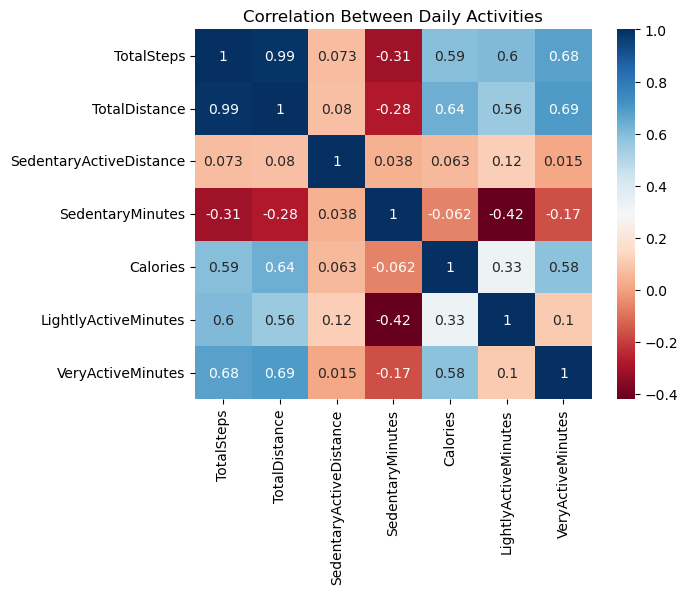

In [77]:
sns.heatmap(daily_activity_all[['TotalSteps', 'TotalDistance', 'SedentaryActiveDistance', 
            'SedentaryMinutes', 'Calories', 'LightlyActiveMinutes', 'VeryActiveMinutes']].corr(), annot=True, cmap='RdBu')
plt.title('Correlation Between Daily Activities')
plt.show()

There are:

* Positive correlation between ['Calories', 'ActiveMinutes', 'TotalSteps','Total Distance']
* Negative correlation between ['SedentaryMinutes', 'TotalSteps'], ['SedentaryMinutes', 'TotalDistance'], ['SedentaryMinutes', 'ActiveMinutes']

Which means one has positive or negative impact on other.

In [79]:
daily_activity_all['active_total'] = (daily_activity_all['VeryActiveMinutes'] + daily_activity_all['FairlyActiveMinutes'] + daily_activity_all['LightlyActiveMinutes'])

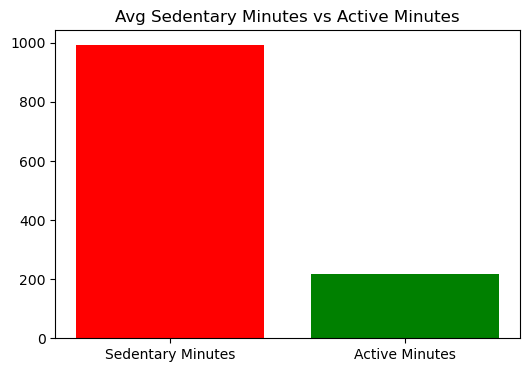

In [80]:
x = np.array(['Sedentary Minutes', 'Active Minutes'])
y = np.array([daily_activity_all['SedentaryMinutes'].mean(), daily_activity_all['active_total'].mean()])

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x, y, color = ['red','green'])
plt.title('Avg Sedentary Minutes vs Active Minutes')
plt.show()

People spent most of their time standing still including their sleep around 992 minute (16.5 hour) and 218 minute (3.6 hour) as active which we will see if it is better to stay active or not.

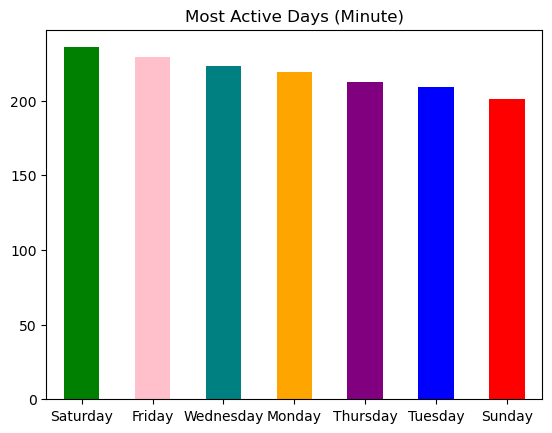

In [82]:
#most active day
ax = daily_activity_all.groupby('day')['active_total'].mean().sort_values(ascending=False)
ax.plot(kind = 'bar', x='day', y = 'active_total', color = ['green','pink','teal','orange','purple','blue','red'])
plt.title('Most Active Days (Minute)')
plt.xticks(rotation=0)
plt.xlabel('')
plt.show()

Most active days are saturdays and fridays. Since it is weekend people most likely do exercise or travel. People tend to stay less active on sundays because they want to rest and prepare themselves for the monday.

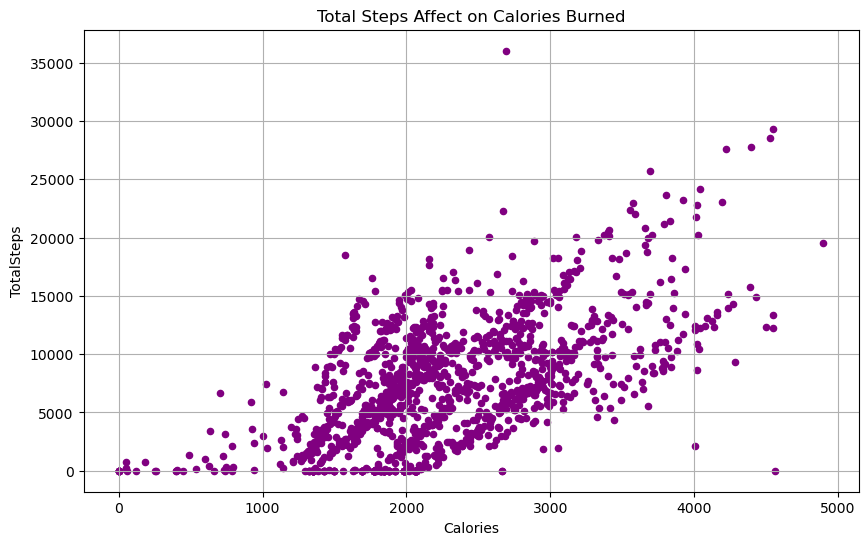

In [84]:
ax = daily_activity_all.plot(kind = 'scatter', 
                        x = 'Calories', y = 'TotalSteps',
                        figsize = (10,6),
                        color = 'purple',
                        title = 'Total Steps Affect on Calories Burned'
                        )
ax.set_xlabel = 'Calories'
ax.set_ylabel = 'TotalSteps'
plt.grid(True)
plt.show()

We found out that the more steps we take the more calories we burn.

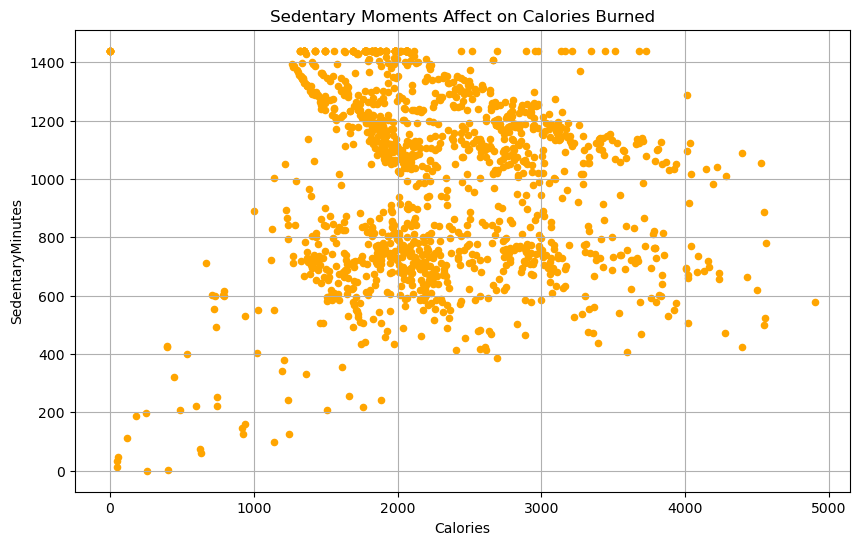

In [86]:
ax = daily_activity_all.plot(kind = 'scatter', 
                        x = 'Calories', y = 'SedentaryMinutes',
                        figsize = (10,6),
                        color = 'orange',
                        title = 'Sedentary Moments Affect on Calories Burned'
                       )
plt.grid(True)
ax.set_xlabel = 'Calories'
ax.set_ylabel = 'SedentaryMinutes'
plt.show()

The more time spent as sedentary means the less calories burned in time.

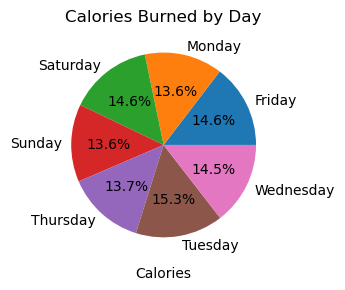

In [88]:
ax = daily_activity_all.groupby('day')['Calories'].sum().plot(kind = 'pie', y = 'day', autopct = '%1.1f%%', figsize = (3,3))
ax.set_ylabel('')
ax.set_xlabel('Calories')
ax.set_title('Calories Burned by Day')
plt.show()

There is no exact correlation between calories burned and each day.

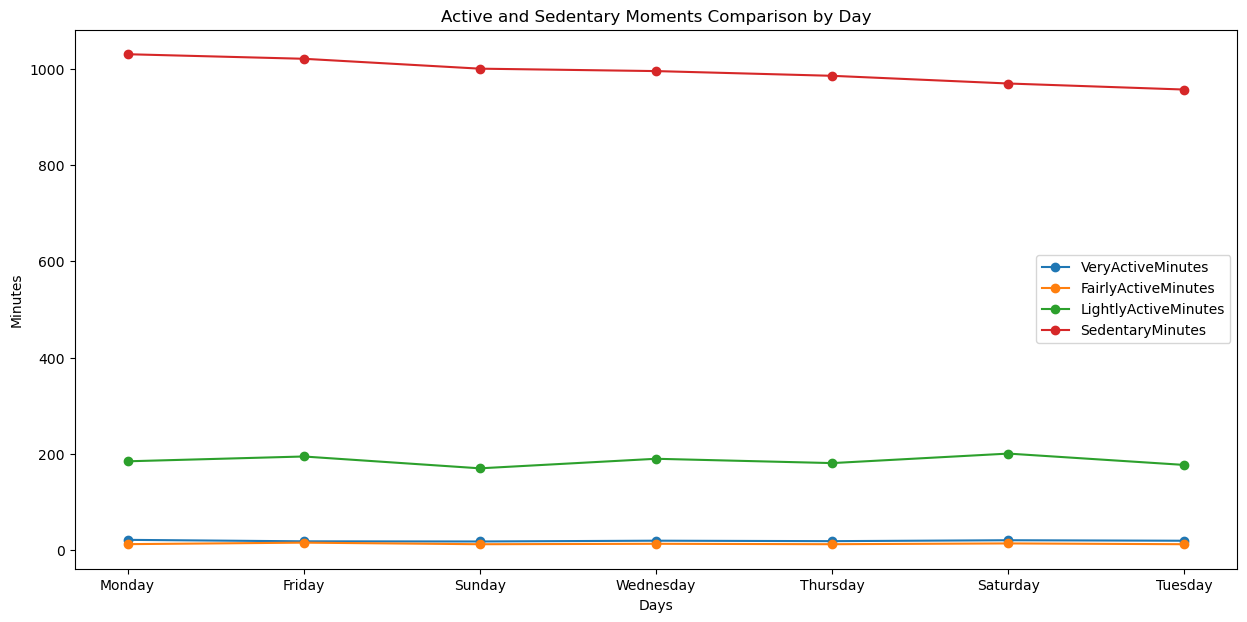

In [90]:
ax = daily_activity_all.groupby('day')[['VeryActiveMinutes', 
                    'FairlyActiveMinutes', 
                    'LightlyActiveMinutes',
                    'SedentaryMinutes' 
                    ]].mean().sort_values('SedentaryMinutes', ascending=False).plot(kind='line', marker='o', figsize = (15,7))
ax.set_xlabel('Days')
ax.set_ylabel('Minutes')
ax.set_title('Active and Sedentary Moments Comparison by Day')
plt.show()

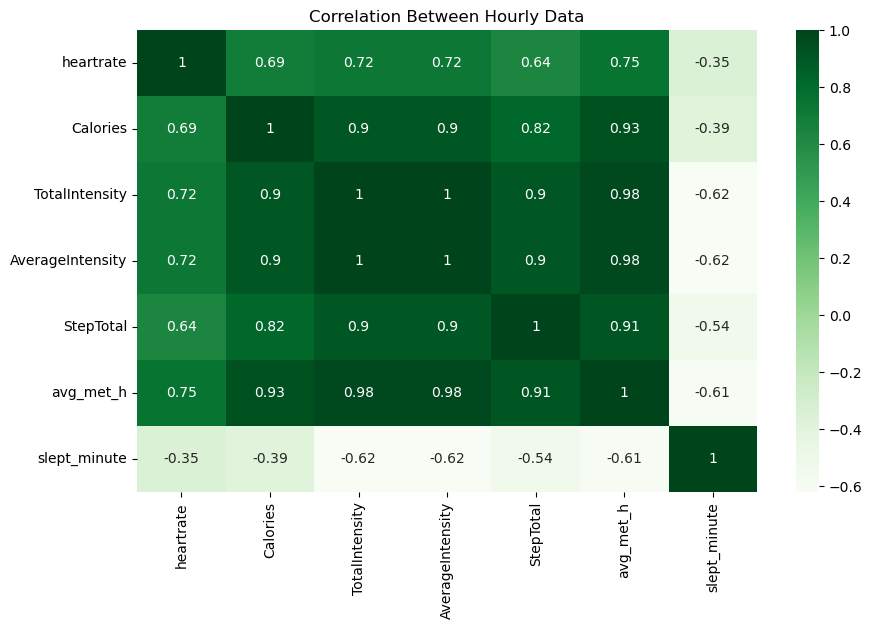

In [91]:
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_merged[['heartrate', 'Calories', 'TotalIntensity', 
            'AverageIntensity', 'StepTotal', 'avg_met_h', 'slept_minute']].corr(), annot=True, cmap='Greens')
plt.title('Correlation Between Hourly Data')
plt.show()

Almost all values have positive correlation except sleep time.

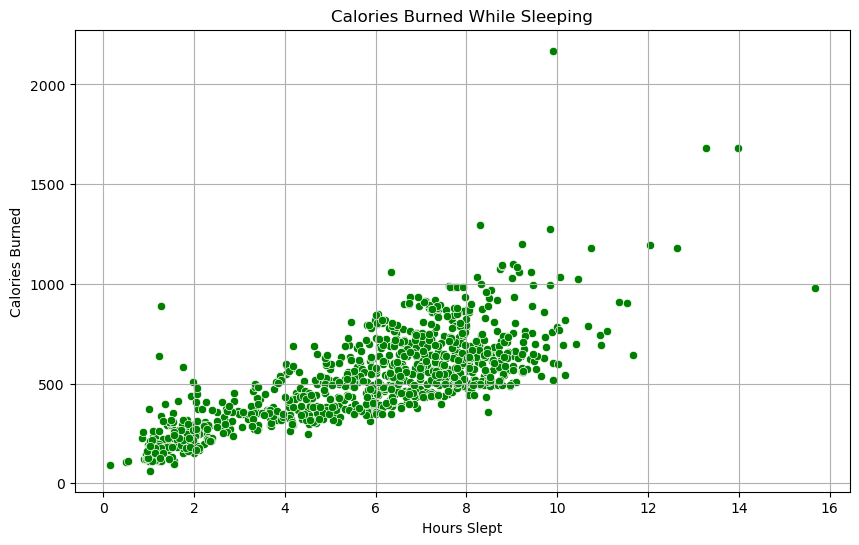

In [93]:
ax = hourly_merged.groupby('logId')[['slept_minute','Calories']].agg({'slept_minute': lambda x: x.sum()/60, 'Calories':'sum'})
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ax, x='slept_minute', y='Calories', color = 'green')
plt.title('Calories Burned While Sleeping')
plt.xlabel('Hours Slept')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()

We see that our bodies continue to burn calories even though we sleep.

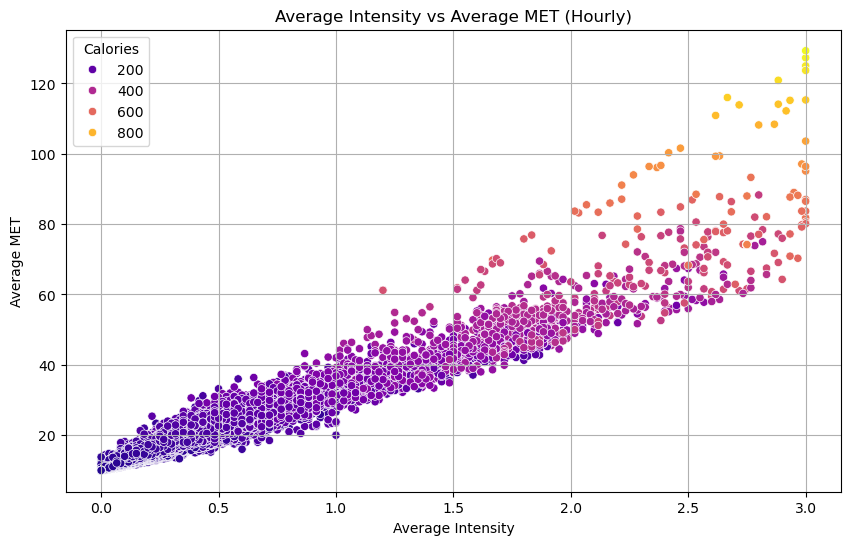

In [95]:
plt.figure(figsize = (10,6))
sns.scatterplot(hourly_merged, x = 'AverageIntensity', y = 'avg_met_h', hue='Calories', palette = 'plasma')
plt.title('Average Intensity vs Average MET (Hourly)')
plt.xlabel('Average Intensity')
plt.ylabel('Average MET')
plt.grid(True)
plt.show()

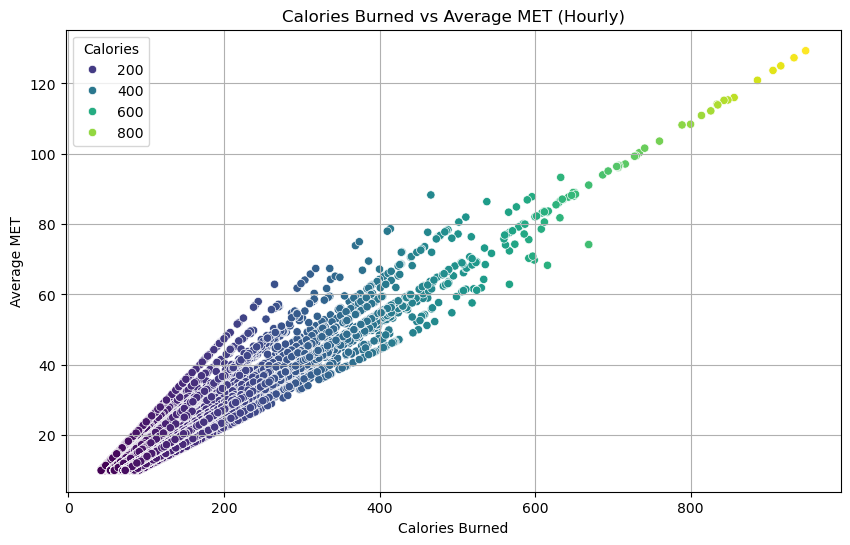

In [96]:
plt.figure(figsize = (10,6))
sns.scatterplot(hourly_merged, x = 'Calories', y = 'avg_met_h', hue='Calories', palette = 'viridis')
plt.title('Calories Burned vs Average MET (Hourly)')
plt.xlabel('Calories Burned')
plt.ylabel('Average MET')
plt.grid(True)
plt.show()

The more calories a person burns, the more energy they expend.

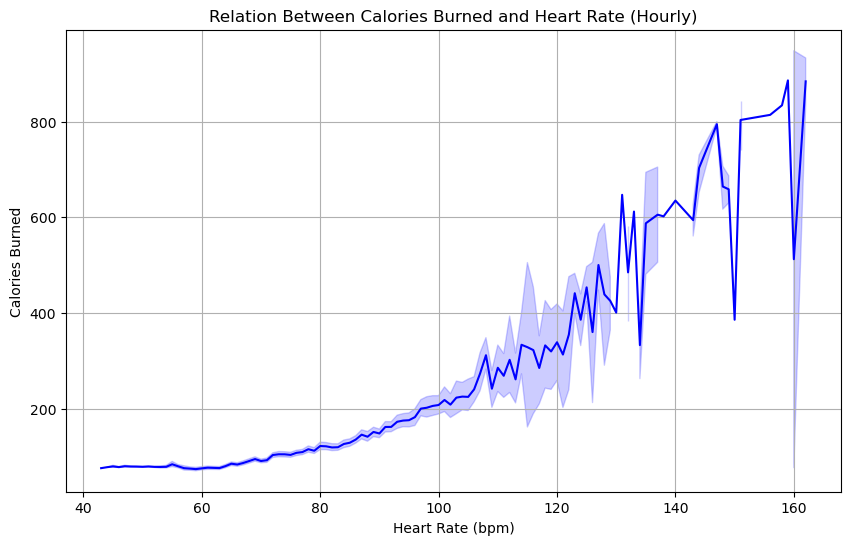

In [98]:
plt.figure(figsize=(10,6))
sns.lineplot(hourly_merged, x = 'heartrate', y = 'Calories', color = 'blue')
plt.grid()
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Calories Burned')
plt.title('Relation Between Calories Burned and Heart Rate (Hourly)')
plt.show()

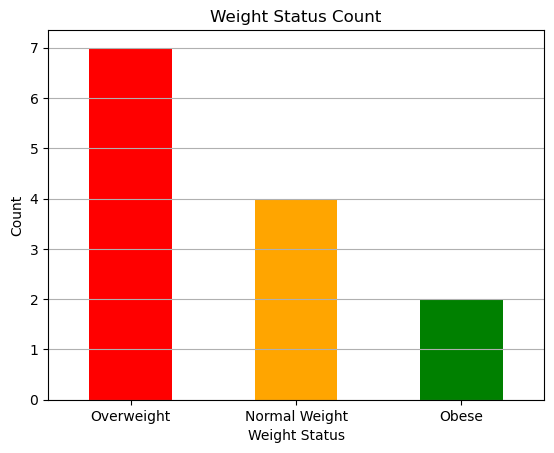

In [99]:
ax = weight_log_all.groupby('Id').agg({'BMI': 'mean'}).reset_index()
def bmi_status(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 24.9:
        return 'Normal Weight'
    elif 25 <= BMI < 29.9:
        return 'Overweight'
    else:
        return 'Obese'
ax['weight_status'] = ax['BMI'].apply(bmi_status)
ax['count'] = 1
ax.groupby('weight_status')['count'].sum().sort_values(ascending = False)\
.plot(kind = 'bar', x = 'weight_status', y = 'count', color = ['red', 'orange', 'green', 'blue'])
plt.title('Weight Status Count')
plt.xlabel('Weight Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

This data includes only 13 people but still it tells us something about the smart device users. Users are most likely have some weight problems and want to lose weight. There are no underweight people in this data but company should do advertisement for underweight people to gain weight. We will discuss this later in the act phase.

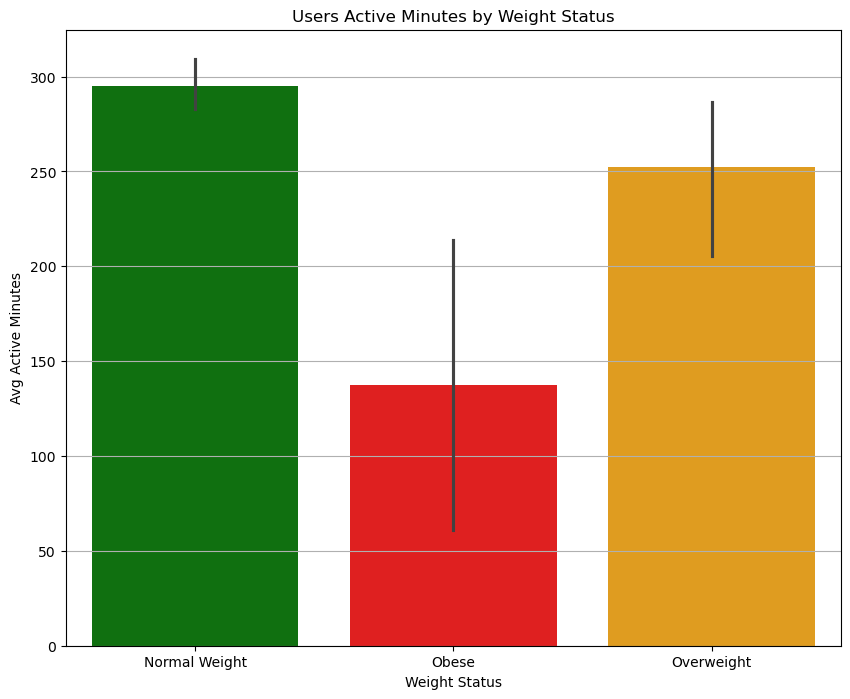

In [101]:
ax = weight_log_all.groupby('Id').agg({'BMI': 'mean'}).reset_index()
def bmi_status(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 24.9:
        return 'Normal Weight'
    elif 25 <= BMI < 29.9:
        return 'Overweight'
    else:
        return 'Obese'
ax['weight_status'] = ax['BMI'].apply(bmi_status)
ay = daily_activity_all.groupby('Id')['active_total'].mean() 
ax.drop(columns = 'BMI', inplace = True)
az = pd.merge(ax, ay, on = 'Id', how = 'inner')
color_mapping = {
    'Underweight': 'green',
    'Normal Weight': 'green',
    'Overweight': 'orange',
    'Obese': 'red'
}
az['color'] = az['weight_status'].map(color_mapping)

plt.figure(figsize = (10,8))
sns.barplot(az, x = 'weight_status', y = 'active_total', hue='weight_status', palette=color_mapping, dodge=False, legend=False)
plt.xlabel('Weight Status')
plt.ylabel('Avg Active Minutes')
plt.title('Users Active Minutes by Weight Status')
plt.grid(axis = 'y')
plt.show()

Obese people spend their time less active then normal weight people.

# Act
## Key Findings & Recommendation

* Since Bellabeat is a woman focused company, the absence of gender and age informations make it hard to come to conclusion. Looking at a data where users are female can lead to more accurate decisions. Or even knowing if the user is pregnant, child or mature can be useful.
* Most of the users tend to have weight issues but non of them are underweight. Company should show interest to people who wants to gain weight (underweight). They should prepare meal plans and workout programs to gain weight. This can be applies to every group of people (overweight, obese, normal weight). I must recommand a fitness tracker app that tracks all calories intake and substract it with calories burned. The result will show if a person gained weight or not that day. People will be informed about their progress and it will keep them motivated.
* According to the data, people that are more active burns more calories. As well as how intense their day is, total steps count, even their heartrate have an effect on calories burned. Inspiring them to be more active via companies products will be benefical to company.
* People spend huge amount of time as sedentary which means they burn less calories. Company should detect and sell devices that tracks the daily lifestyle states. This devices job is to alert people when they don't move so often or stay active as they should be. So they can be aware of the situation and take action against it.
* And lastly advertisement plays a huge role in companies growth. It's best to stay in contact with their successful users and encourage them to give inspirational talks about their journeys. Preparing speeches about healthy lifestyle, planning races, orginizing events with giveaways will influence people and interacting with the audience creates a sincere environment.
